<a href="https://colab.research.google.com/github/goyalmayank1105/machinelearning/blob/master/fashiondatset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.python.framework import ops
from tensorflow.examples.tutorials.mnist import input_data

# Loading Dataset

In [2]:

# Import Fashion MNIST
from keras.datasets import fashion_mnist
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()


Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step


In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = trainX.reshape(trainX.shape[0], 28, 28, 1)
x_test = testX.reshape(testX.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])
y_train=trainY


x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


#Model Building

In [6]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 12s 198us/step - loss: 0.4219 - acc: 0.8504
Epoch 2/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.2877 - acc: 0.8958
Epoch 3/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.2426 - acc: 0.9113
Epoch 4/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.2103 - acc: 0.9231
Epoch 5/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.1870 - acc: 0.9298
Epoch 6/10
60000/60000 [==============================] - 6s 104us/step - loss: 0.1658 - acc: 0.9379
Epoch 7/10
60000/60000 [==============================] - 6s 105us/step - loss: 0.1497 - acc: 0.9442
Epoch 8/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.1330 - acc: 0.9501
Epoch 9/10
60000/60000 [==============================] - 6s 106us/step - loss: 0.1215 - acc: 0.9536
Epoch 10/10
60000/60000 [=================

#Model Evaluation

In [10]:
testX=testX.reshape(testX.shape[0],28,28,1)
model.evaluate(testX,testY)

10000/10000 [==============================] - 0s 46us/step


[1.5577026760935653, 0.9027]

#Prediction

In [0]:
# Create dictionary of target classes
label_dict = {
 0: "T-shirt/top",
 1: "Trouser",
 2: "Pullover",
 3: "Dress",
 4: "Coat",
 5: "Sandal",
 6: "Shirt",
 7: "Sneaker",
 8: "Bag",
 9: "Ankle boot"
}

T-shirt/top


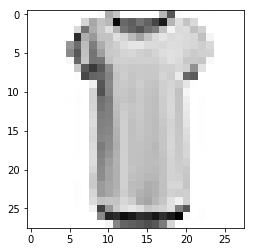

In [17]:
image_index = 6008
plt.imshow(testX[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(testX[image_index].reshape(1,28,28, 1))
print(label_dict[pred.argmax()])